**Домашнее задание к лекции «Корреляция и корреляционный анализ»**

Возьмите датасет Mortality and Water Hardness\
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1.**\
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_water = pd.read_csv('water.csv')
df_water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


Построение точечного графика:

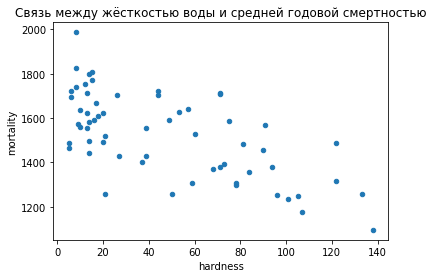

In [ ]:
df_water.plot(kind='scatter',\
              x='hardness',\
              y='mortality',\
              title='Связь между жёсткостью воды и средней годовой смертностью')


Визуально наблюдается обратная связь: чем больше жесткость, тем меньше сметрность.

Расчет коэффициентов корреляции Пирсона и Спирмена:

In [ ]:
# считаем коэф. корреляции Пирсона
df_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Наблюдается средняя отрицательная связь.

In [ ]:
# считаем коэф. корреляции Спирмана
df_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Наблюдается средняя отрицательная связь. Чуть менее сильная, чем Пирсона.

Построение модели линейной регрессии:

Разделим выборки:

In [ ]:
X = df_water[['hardness']]
y = df_water['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Обучение модели:

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.13167087])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [ ]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

Коэффициент детерминации:

In [ ]:
model.score(X_test, y_test)

0.5046490611017092

Коэффициент > 0,5 (это неплохо)

График остатков:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


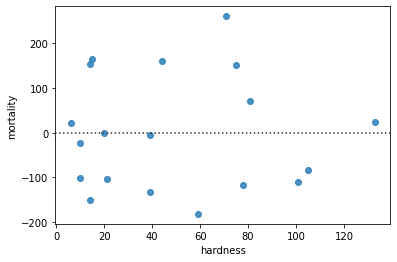

In [ ]:
import seaborn as sns
  
sns.residplot(X_test, y_test-y_pred, data = df_water)
  
plt.show()

Точки нанесены случайным образом, нет шаблона, и точки не основаны на одной стороне, поэтому нет проблемы гетероскедастичности.

Альтернативный способ:

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           7.83e-06
Time:                        10:30:31   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

Гистограмма остатков:

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

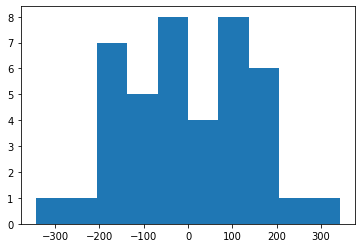

In [ ]:
plt.hist(results.resid, bins=10)

Нет смещения в сторону, но и на нормальное распределение похоже отдалённо. 

**Задание 2.**\
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
df_water_south = df_water[df_water['location']== 'South']
df_water_south

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [ ]:
df_water_north = df_water[df_water['location']== 'North']
df_water_north

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


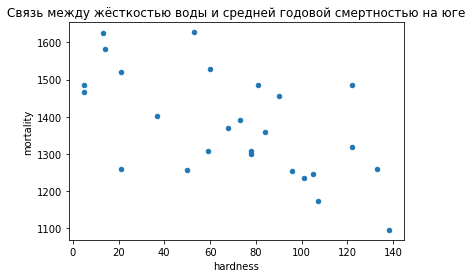

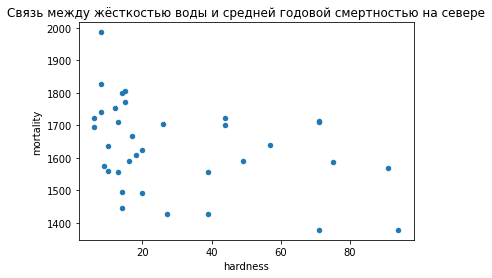

In [ ]:
df_water_south.plot(kind='scatter',\
              x='hardness',\
              y='mortality',\
              title='Связь между жёсткостью воды и средней годовой смертностью на юге')

df_water_north.plot(kind='scatter',\
              x='hardness',\
              y='mortality',\
              title='Связь между жёсткостью воды и средней годовой смертностью на севере')


В целом визуализации похожи, но на севере наблюдается концентрация точек в районе оси Y. То есть, связь слабее и нелинейна.

In [ ]:
# считаем коэф. корреляции Пирсона на Юге
df_water_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
# считаем коэф. корреляции Пирсона на Севере
df_water_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


Коэффициент корреляции Пирсона по данным на Севере ниже, чем на Юге.

In [ ]:
# считаем коэф. корреляции Спирмана на Юге
df_water_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана на Севере
df_water_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Похожий результат по коэффициенту корреляции Спирмена. Любопытно, что по данным Севера коэф. корр. Спирмена оказался выше, чем Пирсона. Возможно, потому что он менее чувствителен к выбросам.

Построим модель линейной регрессии по южным данным.

In [ ]:
X = df_water_south[['hardness']]
y = df_water_south['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)

-1.9300174406554644

Коэффициент детерминации имеет отрицательное значение. Возможно, это связано с тем, что у нас мало данных.

График остатков:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()

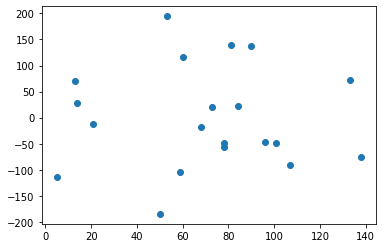

In [ ]:
plt.scatter(X_const.iloc[:, 1], results.resid)

По этому графику мне сложно что-то сказать. Вроде бы точки распределены хаотично, удалённо от центра в обе стороны.

(array([1., 1., 3., 4., 2., 3., 2., 1., 2., 1.]),
 array([-184.70069149, -146.77829311, -108.85589473,  -70.93349635,
         -33.01109797,    4.91130041,   42.83369879,   80.75609717,
         118.67849555,  156.60089393,  194.52329231]),
 <a list of 10 Patch objects>)

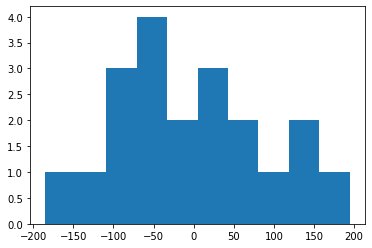

In [ ]:
plt.hist(results.resid, bins=10)

Распределение смещено вправо.

Модель работает плохо.

Построим модель линейной регрессии по северным данным.

In [ ]:
X = df_water_north[['hardness']]
y = df_water_north['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)

-0.18101539518829401

Согласно коэффициенту детерминации эта модель плохо работает.

График остатков:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()

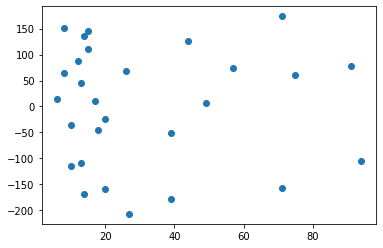

In [ ]:
plt.scatter(X_const.iloc[:, 1], results.resid)

Точки сконцентрированы у оси Y.

(array([2., 3., 3., 0., 4., 3., 1., 6., 2., 4.]),
 array([-207.14480156, -169.04309047, -130.94137939,  -92.8396683 ,
         -54.73795722,  -16.63624613,   21.46546496,   59.56717604,
          97.66888713,  135.77059821,  173.8723093 ]),
 <a list of 10 Patch objects>)

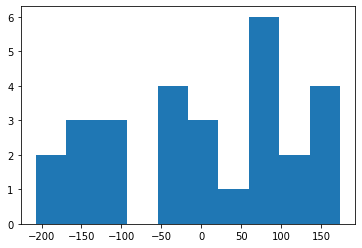

In [ ]:
plt.hist(results.resid, bins=10)

Распределение не похоже на нормальное и смещено вправо.

Модель работает плохо.